# COMP 6915 - Assignment 1
- Professor:       Lourdes Pena-Castillo
- Term:            Winter 2024
- Student Name:    **Daniel Wiredu**
- Student User:    **dbwiredu**
- Student Email:   dbwiredu@mun.ca
- Student ID:      **202286594**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfA = pd.read_csv('A1_dataA.tsv', sep='\t')
dfB = pd.read_csv('A1_dataB.tsv', sep='\t')

In [3]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   X4      100 non-null    float64
 4   X5      100 non-null    float64
 5   class   100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [4]:
dfB.head()

,X1,X2,X3,X4,X5,class
0,0.509022,0.977143,1.807426,-0.456832,1.114991,1
1,0.431006,0.340303,-0.991420,-0.533280,0.033497,1
2,0.601544,1.627891,-0.144424,0.070053,0.485216,1
3,-0.346139,0.435936,1.240060,0.286332,0.475602,1
4,1.669372,0.390462,1.225110,-0.809030,0.088785,1


<Axes: xlabel='class', ylabel='X1'>

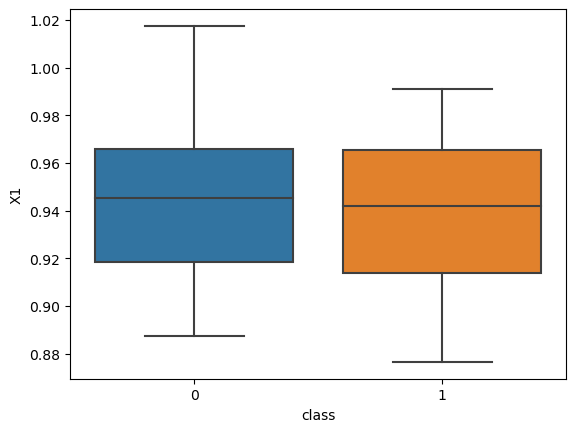

In [5]:
sns.boxplot(x='class',y='X1',data=dfA)

<Axes: xlabel='class', ylabel='X2'>

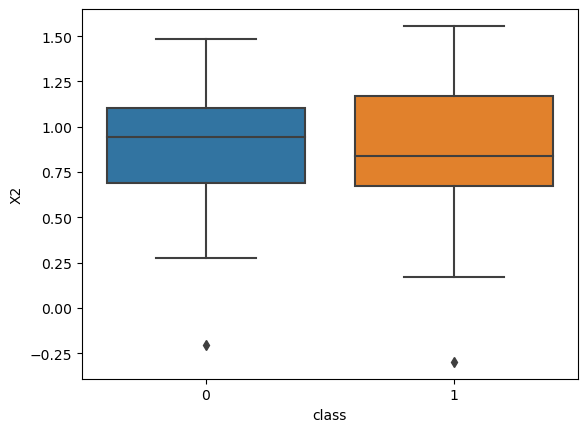

In [6]:
sns.boxplot(x='class',y='X2',data=dfA)

<Axes: xlabel='class', ylabel='X3'>

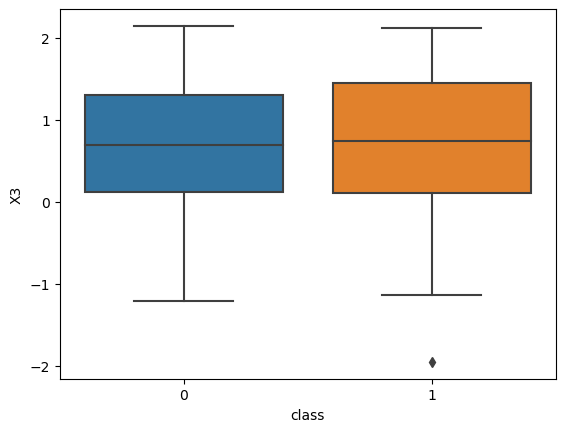

In [7]:
sns.boxplot(x='class',y='X3',data=dfA)

<Axes: xlabel='class', ylabel='X4'>

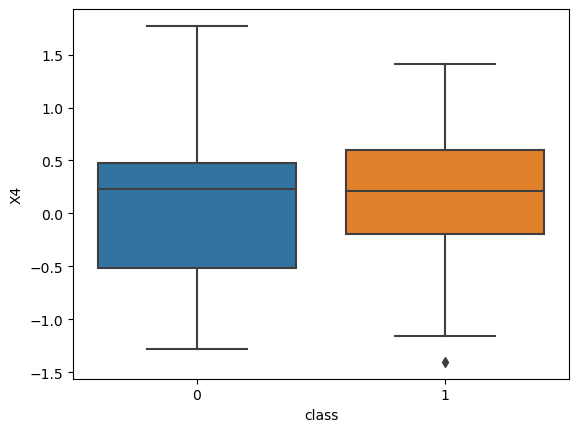

In [8]:
sns.boxplot(x='class',y='X4',data=dfA)

<Axes: xlabel='class', ylabel='X5'>

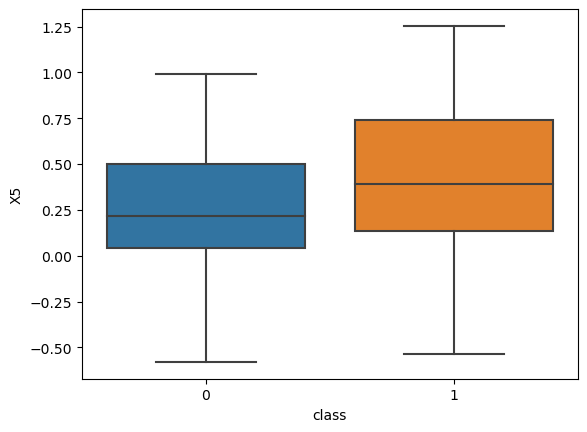

In [9]:
sns.boxplot(x='class',y='X5',data=dfA)

/Users/danielwiredu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


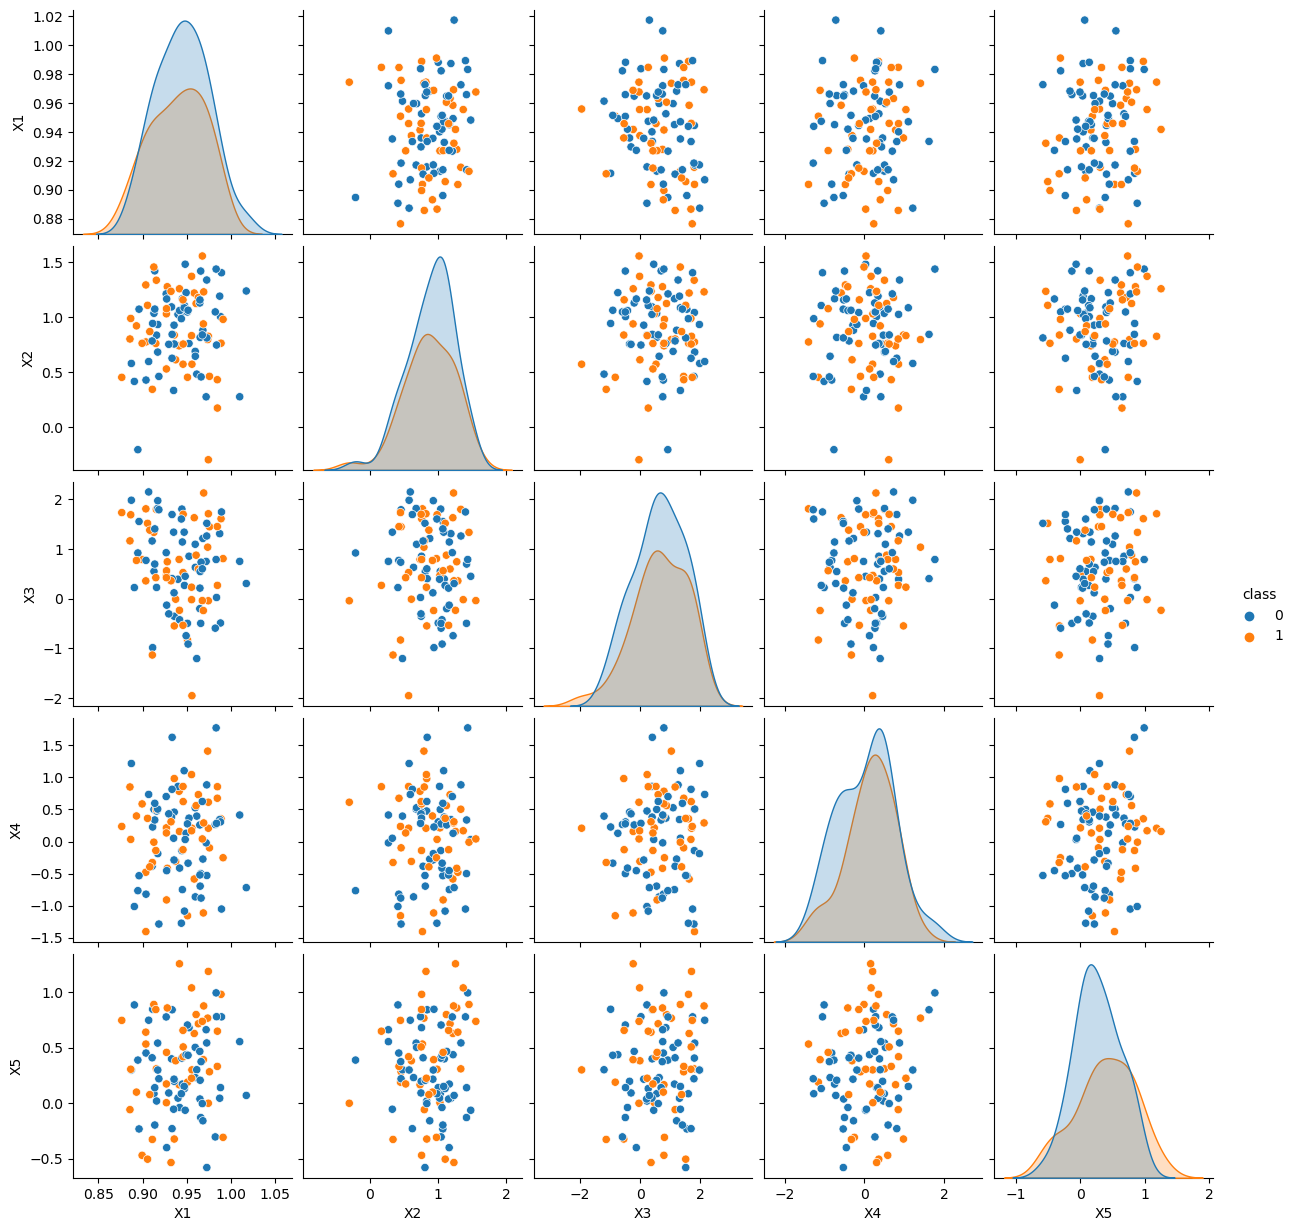

In [15]:
sns.pairplot(dfA.iloc[:,:],hue='class') 

/Users/danielwiredu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


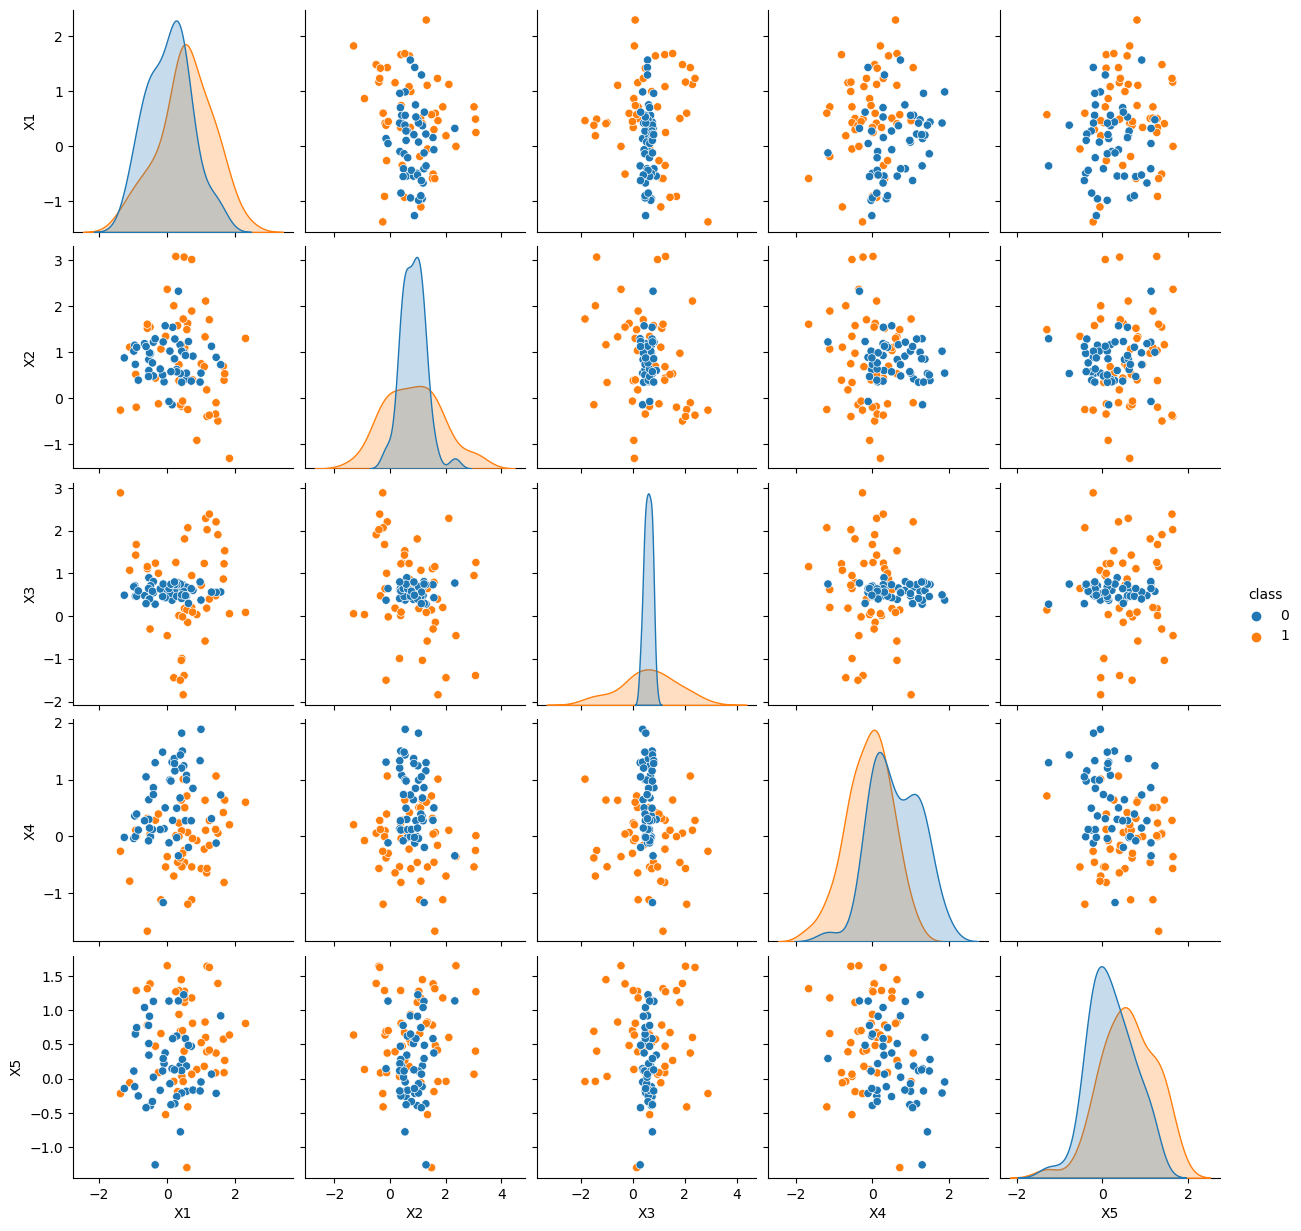

In [16]:
sns.pairplot(dfB.iloc[:,:],hue='class') 

In [17]:
dfA.drop('class',axis=1).corr()

,X1,X2,X3,X4,X5
X1,1.000000,0.078051,-0.180590,0.056359,0.111873
X2,0.078051,1.000000,-0.001483,0.009413,0.063593
X3,-0.180590,-0.001483,1.000000,0.036580,0.082486
X4,0.056359,0.009413,0.036580,1.000000,0.092514
X5,0.111873,0.063593,0.082486,0.092514,1.000000


In [18]:
dfB.drop('class',axis=1).corr()

,X1,X2,X3,X4,X5
X1,1.000000,-0.133326,-0.021483,0.070496,0.111419
X2,-0.133326,1.000000,-0.272336,-0.115267,0.032478
X3,-0.021483,-0.272336,1.000000,-0.070453,0.046973
X4,0.070496,-0.115267,-0.070453,1.000000,-0.262630
X5,0.111419,0.032478,0.046973,-0.262630,1.000000


<Axes: xlabel='X1', ylabel='Density'>

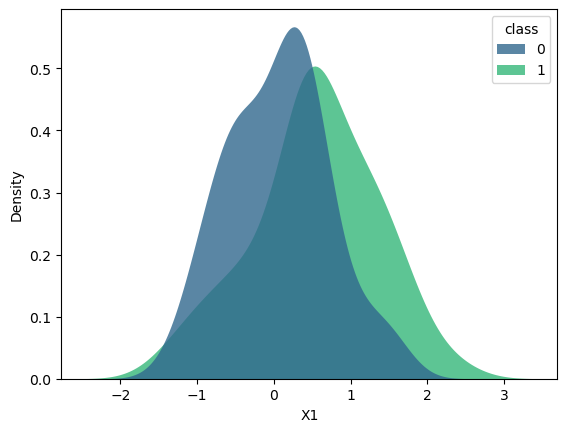

In [19]:
sns.kdeplot(data=dfB, x='X1', hue='class', fill=True,common_norm=False,palette='viridis',alpha=0.8,linewidth=0)

<Axes: xlabel='X2', ylabel='Density'>

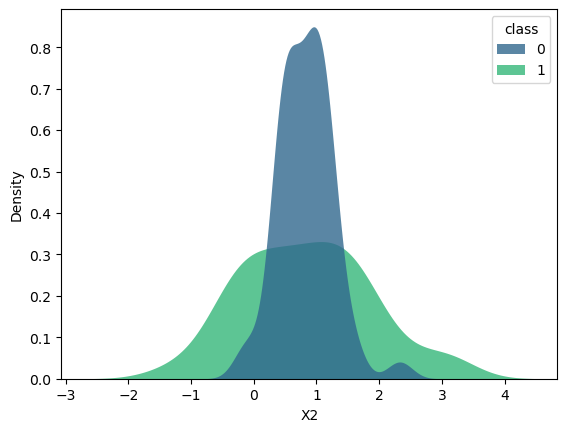

In [20]:
sns.kdeplot(data=dfB, x='X2', hue='class', fill=True,common_norm=False,palette='viridis',alpha=0.8,linewidth=0)

<Axes: xlabel='X3', ylabel='Density'>

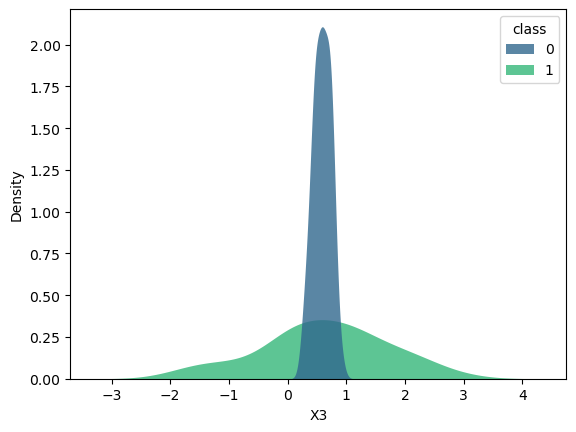

In [21]:
sns.kdeplot(data=dfB, x='X3', hue='class', fill=True,common_norm=False,palette='viridis',alpha=0.8,linewidth=0)

<Axes: xlabel='X4', ylabel='Density'>

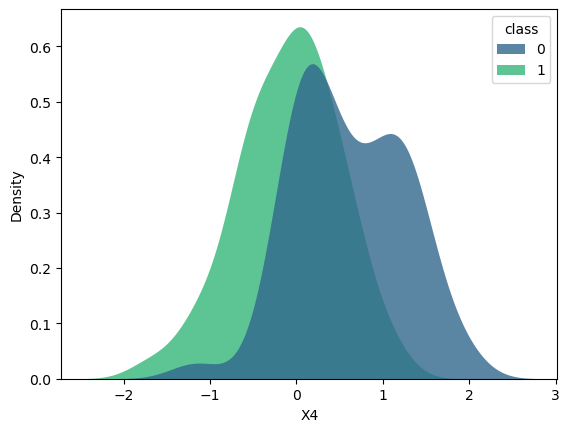

In [22]:
sns.kdeplot(data=dfB, x='X4', hue='class', fill=True,common_norm=False,palette='viridis',alpha=0.8,linewidth=0)

<Axes: xlabel='X5', ylabel='Density'>

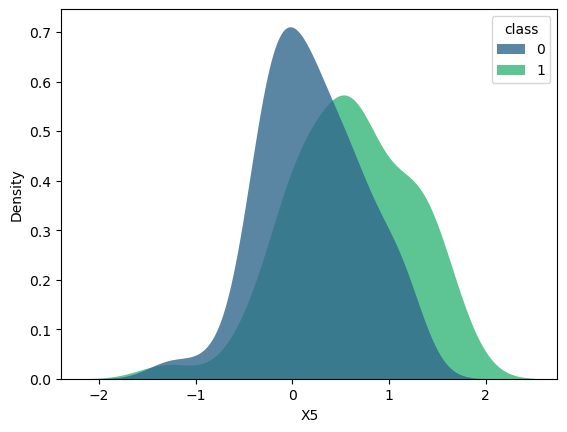

In [23]:
#sns.kdeplot(data=dfB, x='X2', hue='class')
sns.kdeplot(data=dfB, x='X5', hue='class', fill=True,common_norm=False,palette='viridis',alpha=0.8,linewidth=0)

In [24]:
df = dfB

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))
scaled_features = scaler.transform(df.drop('class',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()



,X1,X2,X3,X4,X5
0,0.284022,0.188969,1.594390,-1.021875,1.181415
1,0.181587,-0.634490,-2.078744,-1.131885,-0.602341
2,0.405502,1.030412,-0.967168,-0.263671,0.142700
3,-0.838795,-0.510832,0.849794,0.047562,0.126842
4,1.807547,-0.569632,0.830174,-1.528698,-0.511152


In [25]:
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, average_precision_score, precision_score, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

FOLDS = 10

def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):
    y_real = []
    y_proba = []
    y_pred = []

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        pred = classifier.predict(X.iloc[test])
        ytest = y.iloc[test]
        # Compute ROC curve and area the curve
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])
        
        # Plotting each individual PR Curve
        plt.plot(recall, precision, lw=1, alpha=0.6,label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))
        
        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])
        y_pred.append(pred)
        
        # check scores - each fold
        average_precision = average_precision_score(ytest, probas_[:,1])
        acc_score = accuracy_score(ytest, pred)
        f1 = f1_score(ytest, pred)
        precision = precision_score(ytest, pred)
        recall = recall_score(ytest, pred) 
        print(f'Fold {i+1},', f'Accuracy: {acc_score:0.2f}, Precision:{precision:0.2f}, Recall:{recall:0.2f}, F1:{f1:0.2f}, AvgPrecision:{average_precision:0.2f}')

        i += 1
    
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    y_pred = np.concatenate(y_pred)
    
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    
    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=1)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()
    
    # check scores - entire dataset
    average_precision = average_precision_score(y_real, y_proba)
    acc_score = accuracy_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    print(f'Accuracy: {acc_score:0.2f}, Precision:{precision:0.2f}, Recall:{recall:0.2f}, F1:{f1:0.2f}, AvgPrecision:{average_precision:0.2f}')
    

Fold 1, Accuracy: 0.60, Precision:0.67, Recall:0.40, F1:0.50, AvgPrecision:0.71
Fold 2, Accuracy: 0.70, Precision:0.67, Recall:0.80, F1:0.73, AvgPrecision:0.70
Fold 3, Accuracy: 0.70, Precision:0.67, Recall:0.80, F1:0.73, AvgPrecision:0.70
Fold 4, Accuracy: 0.60, Precision:0.50, Recall:0.25, F1:0.33, AvgPrecision:0.50
Fold 5, Accuracy: 0.80, Precision:0.75, Recall:0.75, F1:0.75, AvgPrecision:0.72
Fold 6, Accuracy: 0.40, Precision:0.25, Recall:0.25, F1:0.25, AvgPrecision:0.35
Fold 7, Accuracy: 0.40, Precision:0.33, Recall:0.50, F1:0.40, AvgPrecision:0.37
Fold 8, Accuracy: 0.70, Precision:0.67, Recall:0.50, F1:0.57, AvgPrecision:0.53
Fold 9, Accuracy: 0.50, Precision:0.33, Recall:0.25, F1:0.29, AvgPrecision:0.38
Fold 10, Accuracy: 0.80, Precision:1.00, Recall:0.50, F1:0.67, AvgPrecision:0.75


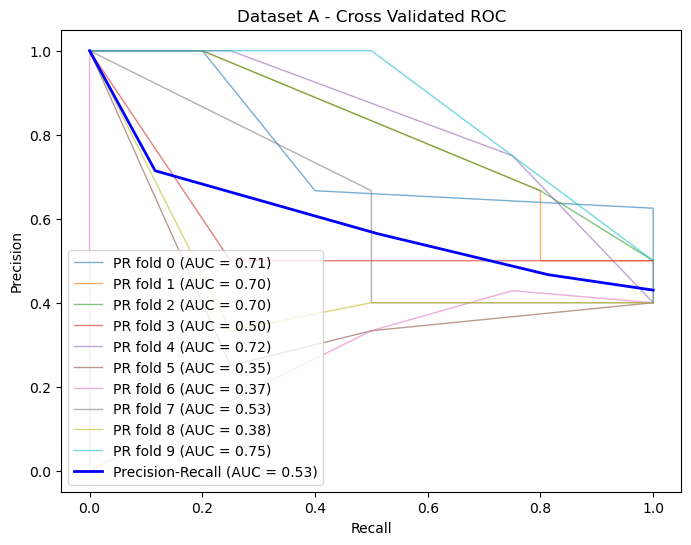

Accuracy: 0.62, Precision:0.56, Recall:0.51, F1:0.54, AvgPrecision:0.53


In [26]:
# Dataset A
X = dfA.drop('class',axis=1)
y = dfA['class']

plt.figure(figsize=(8, 6))

# KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Stratified K Fold
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=12345)

draw_cv_pr_curve(clf, cv, X, y, title='Dataset A - Cross Validated ROC')

Fold 1, Accuracy: 0.90, Precision:1.00, Recall:0.80, F1:0.89, AvgPrecision:0.90
Fold 2, Accuracy: 0.80, Precision:1.00, Recall:0.60, F1:0.75, AvgPrecision:0.83
Fold 3, Accuracy: 0.90, Precision:1.00, Recall:0.80, F1:0.89, AvgPrecision:0.90
Fold 4, Accuracy: 0.90, Precision:1.00, Recall:0.80, F1:0.89, AvgPrecision:0.90
Fold 5, Accuracy: 1.00, Precision:1.00, Recall:1.00, F1:1.00, AvgPrecision:1.00
Fold 6, Accuracy: 0.70, Precision:0.75, Recall:0.60, F1:0.67, AvgPrecision:0.83
Fold 7, Accuracy: 0.70, Precision:0.75, Recall:0.60, F1:0.67, AvgPrecision:0.93
Fold 8, Accuracy: 0.90, Precision:1.00, Recall:0.80, F1:0.89, AvgPrecision:0.97
Fold 9, Accuracy: 0.70, Precision:0.67, Recall:0.80, F1:0.73, AvgPrecision:0.66
Fold 10, Accuracy: 0.70, Precision:0.75, Recall:0.60, F1:0.67, AvgPrecision:0.83


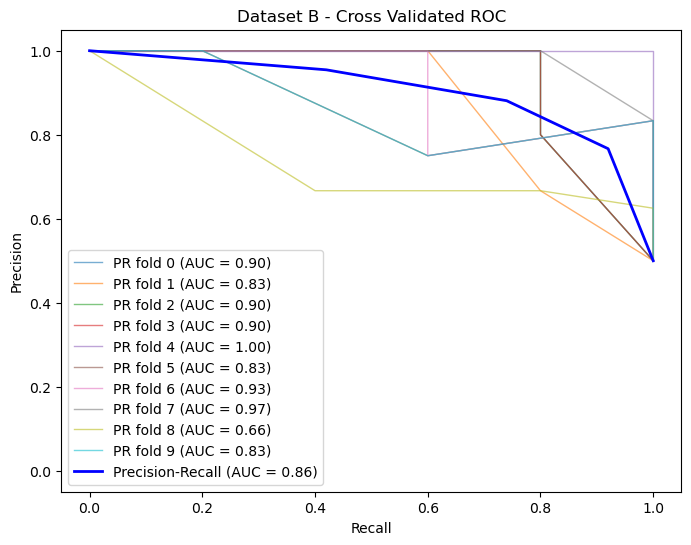

Accuracy: 0.82, Precision:0.88, Recall:0.74, F1:0.80, AvgPrecision:0.86


In [27]:
# Dataset B
X = dfB.drop('class',axis=1)
y = dfB['class']

plt.figure(figsize=(8, 6))

# Creating KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Stratified K Fold
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=12345)
draw_cv_pr_curve(clf, cv, X, y, title='Dataset B - Cross Validated ROC')

References
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
- https://youtu.be/-8s9KuNo5SA?si=faFV88g6oFiR8b1E 